In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
cmx=confusion_matrixes=pd.read_feather("data/confusion_matrixes.feather")
replaced=cmx["MODEL"].str.extract(r"mirluvams/(\w+-\w+)-.+") #shorten names to plot easier
cmx["MODEL"]=replaced.where(~replaced.isna(), cmx["MODEL"], axis=0)

In [3]:
res=results=pd.read_feather("data/results.feather")
replaced=res["MODEL"].str.extract(r"mirluvams/(\w+-\w+)-.+")
res["MODEL"]=replaced.where(~replaced.isna(), res["MODEL"], axis=0)

In [4]:
res.shape

(189, 5)

In [5]:
res.columns

Index(['MODEL', 'SLICE', 'METRIC', 'CLASS', 'VALUE'], dtype='object')

In [6]:
res

,MODEL,SLICE,METRIC,CLASS,VALUE
0,swinv2-base,train,PRECISION,INACTIVO,0.988327
1,swinv2-base,train,RECALL,INACTIVO,0.986408
2,swinv2-base,train,F1-SCORE,INACTIVO,0.987366
3,swinv2-base,train,SUPPORT,INACTIVO,1030.000000
4,swinv2-base,train,PRECISION,FUMAROLA,0.989266
...,...,...,...,...,...
184,y_median,total,PRECISION,WEIGHTED_AVG,0.263398
185,y_median,total,RECALL,WEIGHTED_AVG,0.513223
186,y_median,total,F1-SCORE,WEIGHTED_AVG,0.348129
187,y_median,total,SUPPORT,WEIGHTED_AVG,16297.000000


In [7]:

sns.set_theme(style="darkgrid", palette="viridis")

In [8]:
def plot_metric(metric, label=None):
    filtered=res[(res["SLICE"]=="test") & (res["METRIC"]==metric)]
    f, ax = plt.subplots(figsize=(12, 7))
    ax=sns.barplot(y="MODEL", x="VALUE", data=filtered, hue="CLASS", orient="h", ax=ax)
    if label is not None:
        plt.xlabel(label)
    plt.ylabel("Modelo")
    return filtered[["MODEL", "SLICE", "CLASS", "VALUE"]]

In [9]:
filtered=res[(res["METRIC"]=="ACCURACY")]

In [10]:
print("Accuracy")
filtered[["MODEL", "SLICE", "VALUE"]].pivot(index="MODEL", columns=["SLICE"], values=["VALUE"])

Accuracy


VALUE                    
SLICE            test     total     train
MODEL                                    
swinv2-base  0.884663  0.973922  0.983841
y_mean       0.513497  0.513223  0.513193
y_median     0.513497  0.513223  0.513193

<Axes: xlabel='VALUE', ylabel='MODEL'>

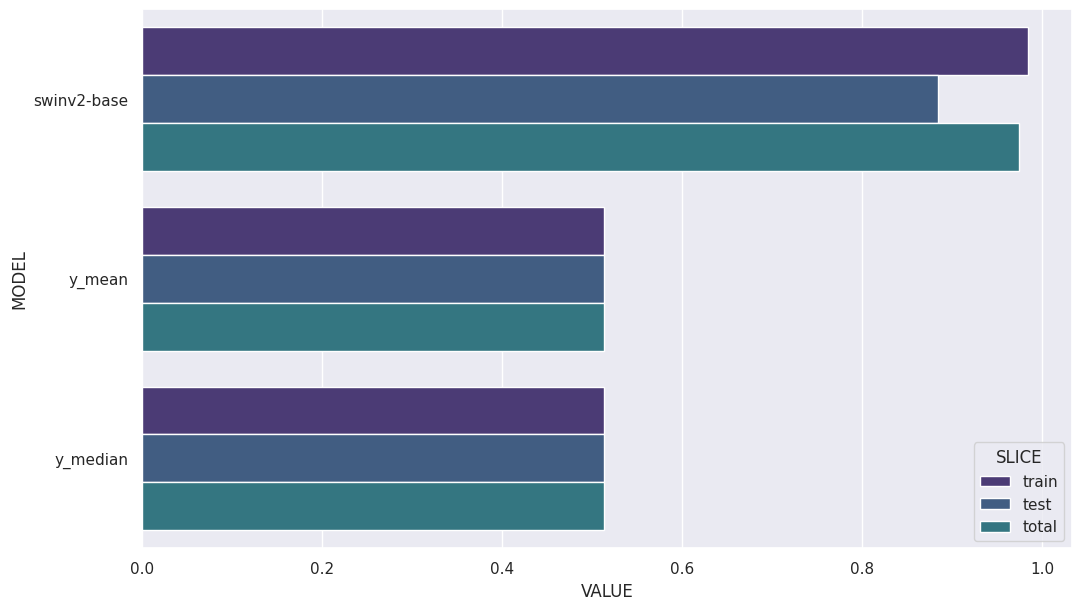

In [11]:
f, ax = plt.subplots(figsize=(12, 7))
sns.barplot(y="MODEL", x="VALUE", data=filtered, hue="SLICE", orient="h", ax=ax)

F1


VALUE                                           
CLASS        ERUPCION  FUMAROLA  INACTIVO MACRO_AVG WEIGHTED_AVG
MODEL                                                           
swinv2-base  0.885818  0.890887  0.829493  0.868733     0.884482
y_mean       0.000000  0.678557  0.000000  0.226186     0.348437
y_median     0.000000  0.678557  0.000000  0.226186     0.348437

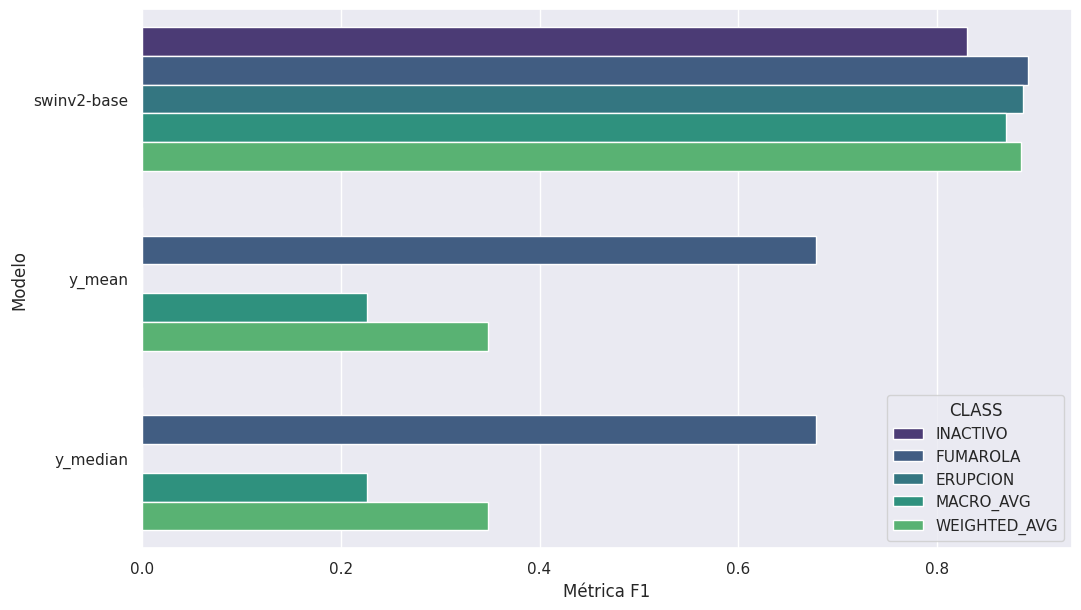

In [12]:
print("F1")
filtered=plot_metric("F1-SCORE", "Métrica F1")
plt.savefig("metrics/f1_global.png")
filtered.pivot(index="MODEL", columns=["CLASS"], values=["VALUE"])

Precisión


VALUE                                           
CLASS       ERUPCION  FUMAROLA  INACTIVO MACRO_AVG WEIGHTED_AVG
MODEL                                                          
swinv2-base    0.875  0.894103  0.873786  0.880963     0.884725
y_mean         0.000  0.513497  0.000000  0.171166     0.263679
y_median       0.000  0.513497  0.000000  0.171166     0.263679

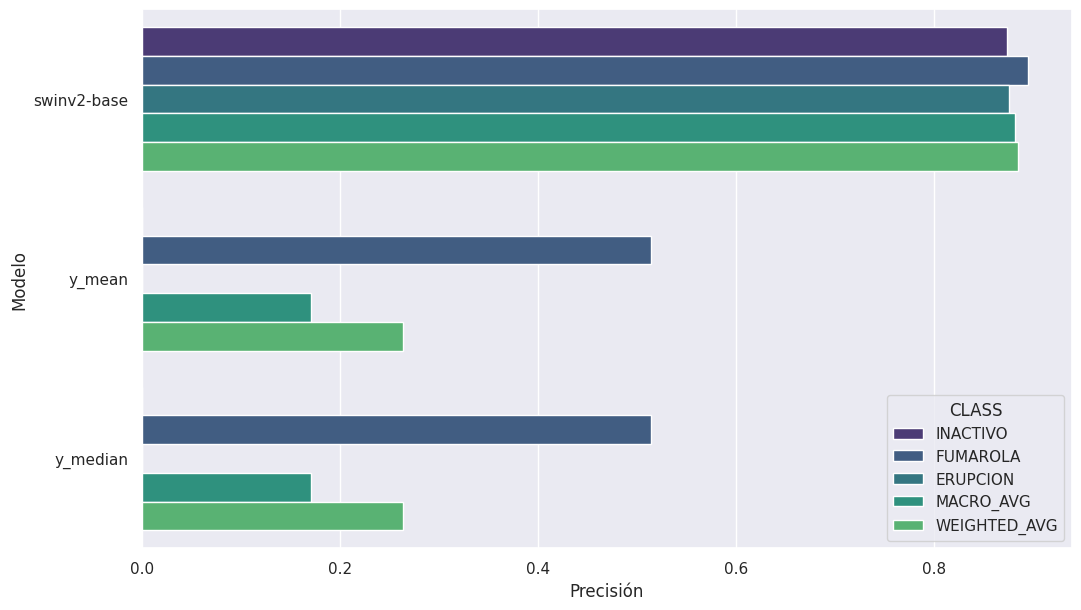

In [13]:
print("Precisión")
filtered=plot_metric("PRECISION", "Precisión")
plt.savefig("metrics/precision_global.png")
filtered.pivot(index="MODEL", columns=["CLASS"], values=["VALUE"])

Exhaustividad


VALUE                                           
CLASS        ERUPCION  FUMAROLA  INACTIVO MACRO_AVG WEIGHTED_AVG
MODEL                                                           
swinv2-base  0.896907  0.887694  0.789474  0.858025     0.884663
y_mean       0.000000  1.000000  0.000000  0.333333     0.513497
y_median     0.000000  1.000000  0.000000  0.333333     0.513497

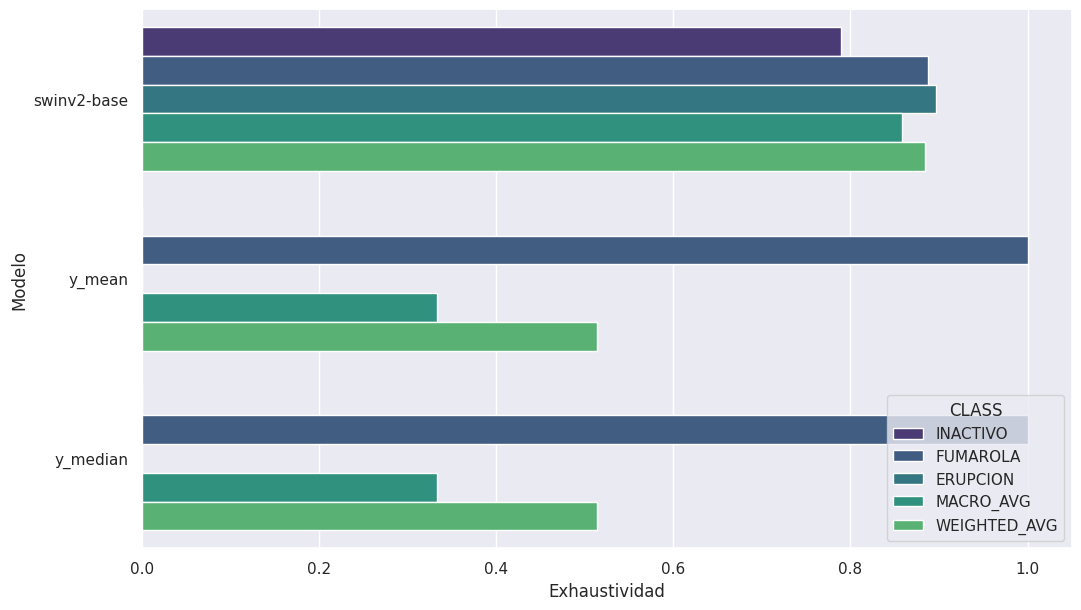

In [14]:
print("Exhaustividad")
filtered=plot_metric("RECALL", "Exhaustividad")
plt.savefig("metrics/recall_global.png")
filtered.pivot(index="MODEL", columns=["CLASS"], values=["VALUE"])

In [15]:

sns.set_theme(style="darkgrid",palette=sns.color_palette("cividis", 7))
def plot_model(model):
    filtered=res[(res["MODEL"]==model) & (res["SLICE"]=="test") & (res["METRIC"]!="SUPPORT")]
    f, ax = plt.subplots(figsize=(12, 7))
    ax=sns.barplot(y="METRIC", x="VALUE", data=filtered, hue="CLASS", orient="h", ax=ax)
    plt.xlabel("Valor")
    plt.ylabel("Métrica")
    plt.title(model)
    return filtered

VALUE                                                     
CLASS      ERUPCION  FUMAROLA   GENERAL  INACTIVO MACRO_AVG WEIGHTED_AVG
METRIC                                                                  
ACCURACY        NaN       NaN  0.884663       NaN       NaN          NaN
F1-SCORE   0.885818  0.890887       NaN  0.829493  0.868733     0.884482
PRECISION  0.875000  0.894103       NaN  0.873786  0.880963     0.884725
RECALL     0.896907  0.887694       NaN  0.789474  0.858025     0.884663

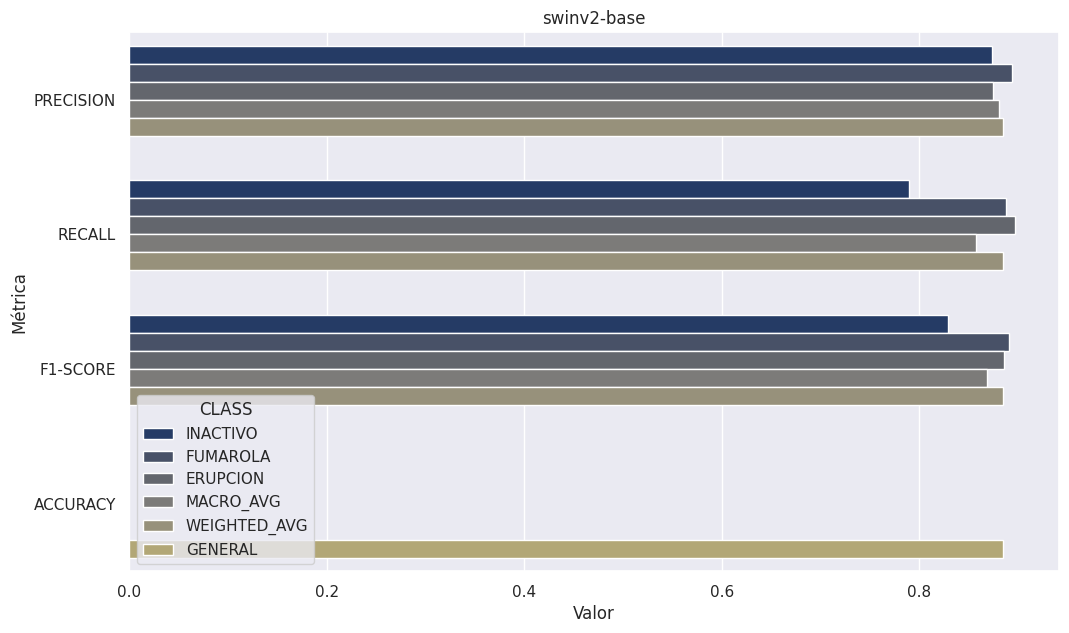

In [17]:
filtered=plot_model("swinv2-base")
plt.savefig("metrics/swinv2-base-metrics.png")
filtered.pivot(index="METRIC", columns=["CLASS"], values=["VALUE"])

METRIC


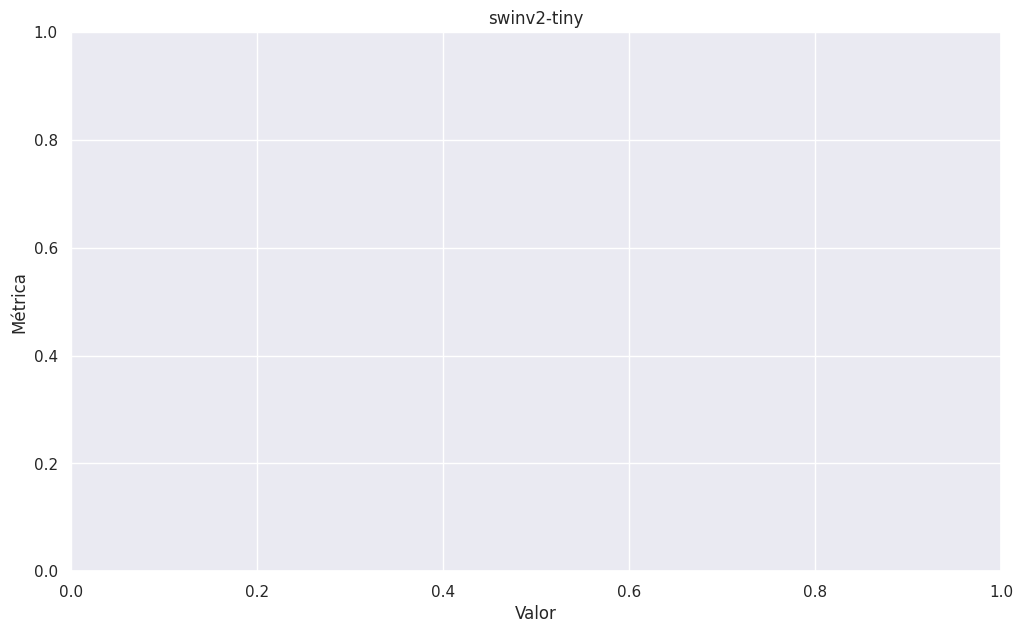

In [18]:
filtered=plot_model("swinv2-tiny")
plt.savefig("metrics/swinv2-tiny-metrics.png")
filtered.pivot(index="METRIC", columns=["CLASS"], values=["VALUE"])

VALUE                                                            \
CLASS       GENERAL  INACTIVE MACRO_AVG WEIGHTED_AVG WITH_EXPLOSION WITH_FUME   
METRIC                                                                          
ACCURACY   0.851812       NaN       NaN          NaN            NaN       NaN   
F1-SCORE        NaN  0.787500  0.692423     0.844148       0.233333  0.863085   
PRECISION       NaN  0.851351  0.815264     0.848790       0.700000  0.835570   
RECALL          NaN  0.732558  0.665690     0.851812       0.140000  0.892473   

                                   
CLASS     WITH_FUME_AND_EXPLOSION  
METRIC                             
ACCURACY                      NaN  
F1-SCORE                 0.885774  
PRECISION                0.874136  
RECALL                   0.897727

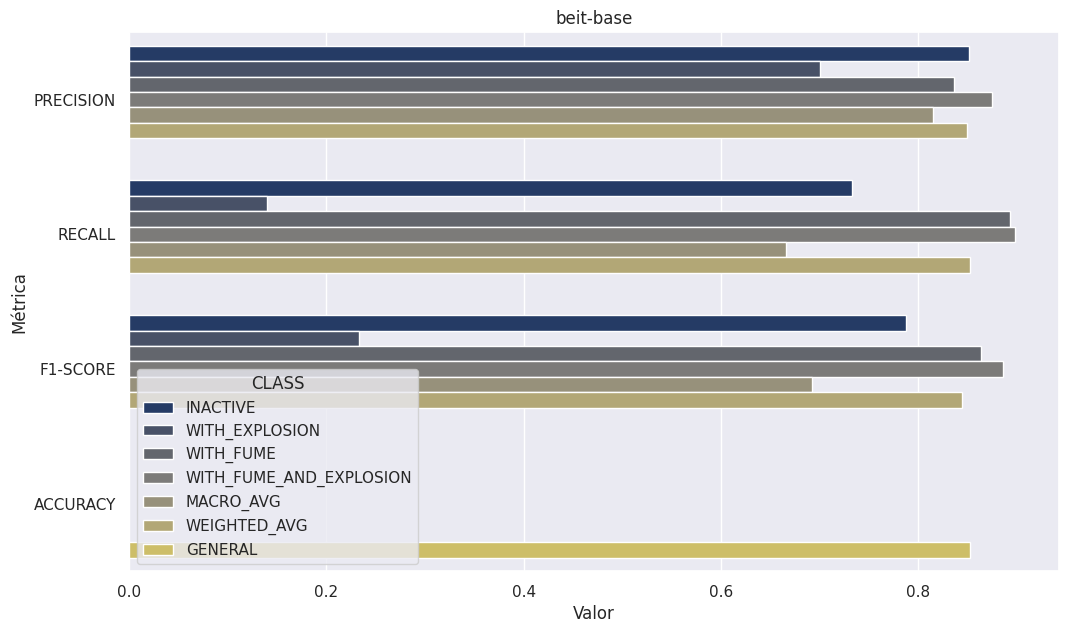

In [18]:
filtered=plot_model("beit-base")
plt.savefig("metrics/beit-base-metrics.png")
filtered.pivot(index="METRIC", columns=["CLASS"], values=["VALUE"])

VALUE                                                            \
CLASS       GENERAL  INACTIVE MACRO_AVG WEIGHTED_AVG WITH_EXPLOSION WITH_FUME   
METRIC                                                                          
ACCURACY   0.853975       NaN       NaN          NaN            NaN       NaN   
F1-SCORE        NaN  0.814516  0.746878     0.853005       0.425532  0.868957   
PRECISION       NaN  0.848739  0.760097     0.853093       0.454545  0.847727   
RECALL          NaN  0.782946  0.735530     0.853975       0.400000  0.891278   

                                   
CLASS     WITH_FUME_AND_EXPLOSION  
METRIC                             
ACCURACY                      NaN  
F1-SCORE                 0.878505  
PRECISION                0.889374  
RECALL                   0.867898

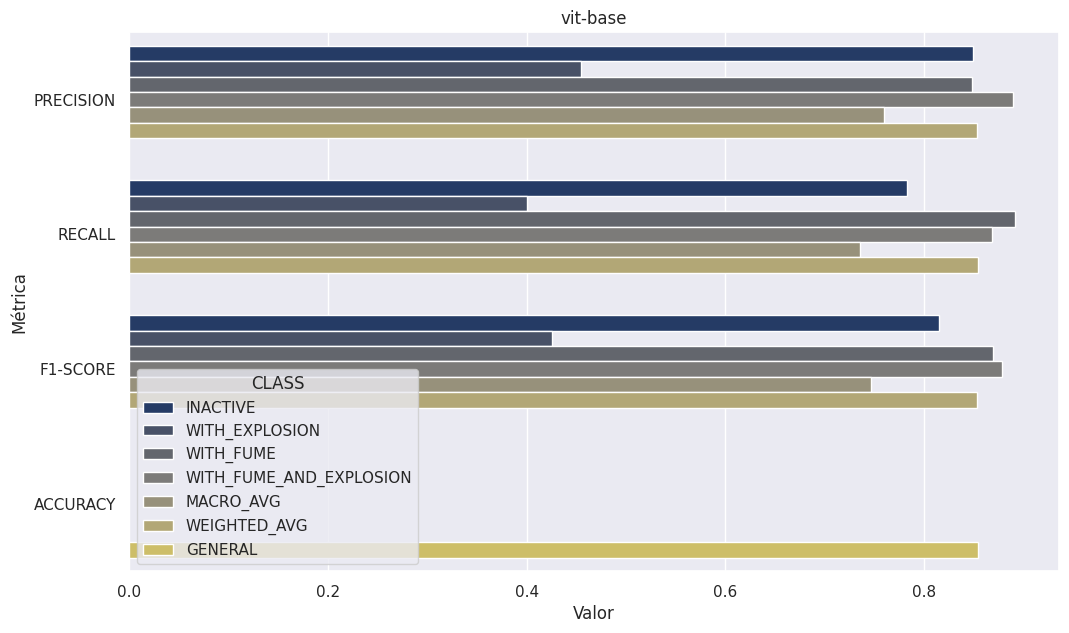

In [19]:
filtered=plot_model("vit-base")
plt.savefig("metrics/vit-base-metrics.png")
filtered.pivot(index="METRIC", columns=["CLASS"], values=["VALUE"])

In [19]:
cmx

,MODEL,SLICE,MATRIX
0,swinv2-base,train,"[1016, 13, 1, 10, 7373, 144, 2, 67, 6041]"
1,swinv2-base,test,"[90, 19, 5, 12, 743, 82, 1, 69, 609]"
2,swinv2-base,total,"[1106, 32, 6, 22, 8116, 226, 3, 136, 6650]"
3,y_mean,train,"[0, 1030, 0, 0, 7527, 0, 0, 6110, 0]"
4,y_mean,test,"[0, 114, 0, 0, 837, 0, 0, 679, 0]"
5,y_mean,total,"[0, 1144, 0, 0, 8364, 0, 0, 6789, 0]"
6,y_median,train,"[0, 1030, 0, 0, 7527, 0, 0, 6110, 0]"
7,y_median,test,"[0, 114, 0, 0, 837, 0, 0, 679, 0]"
8,y_median,total,"[0, 1144, 0, 0, 8364, 0, 0, 6789, 0]"


In [20]:
cmx.shape

(9, 3)

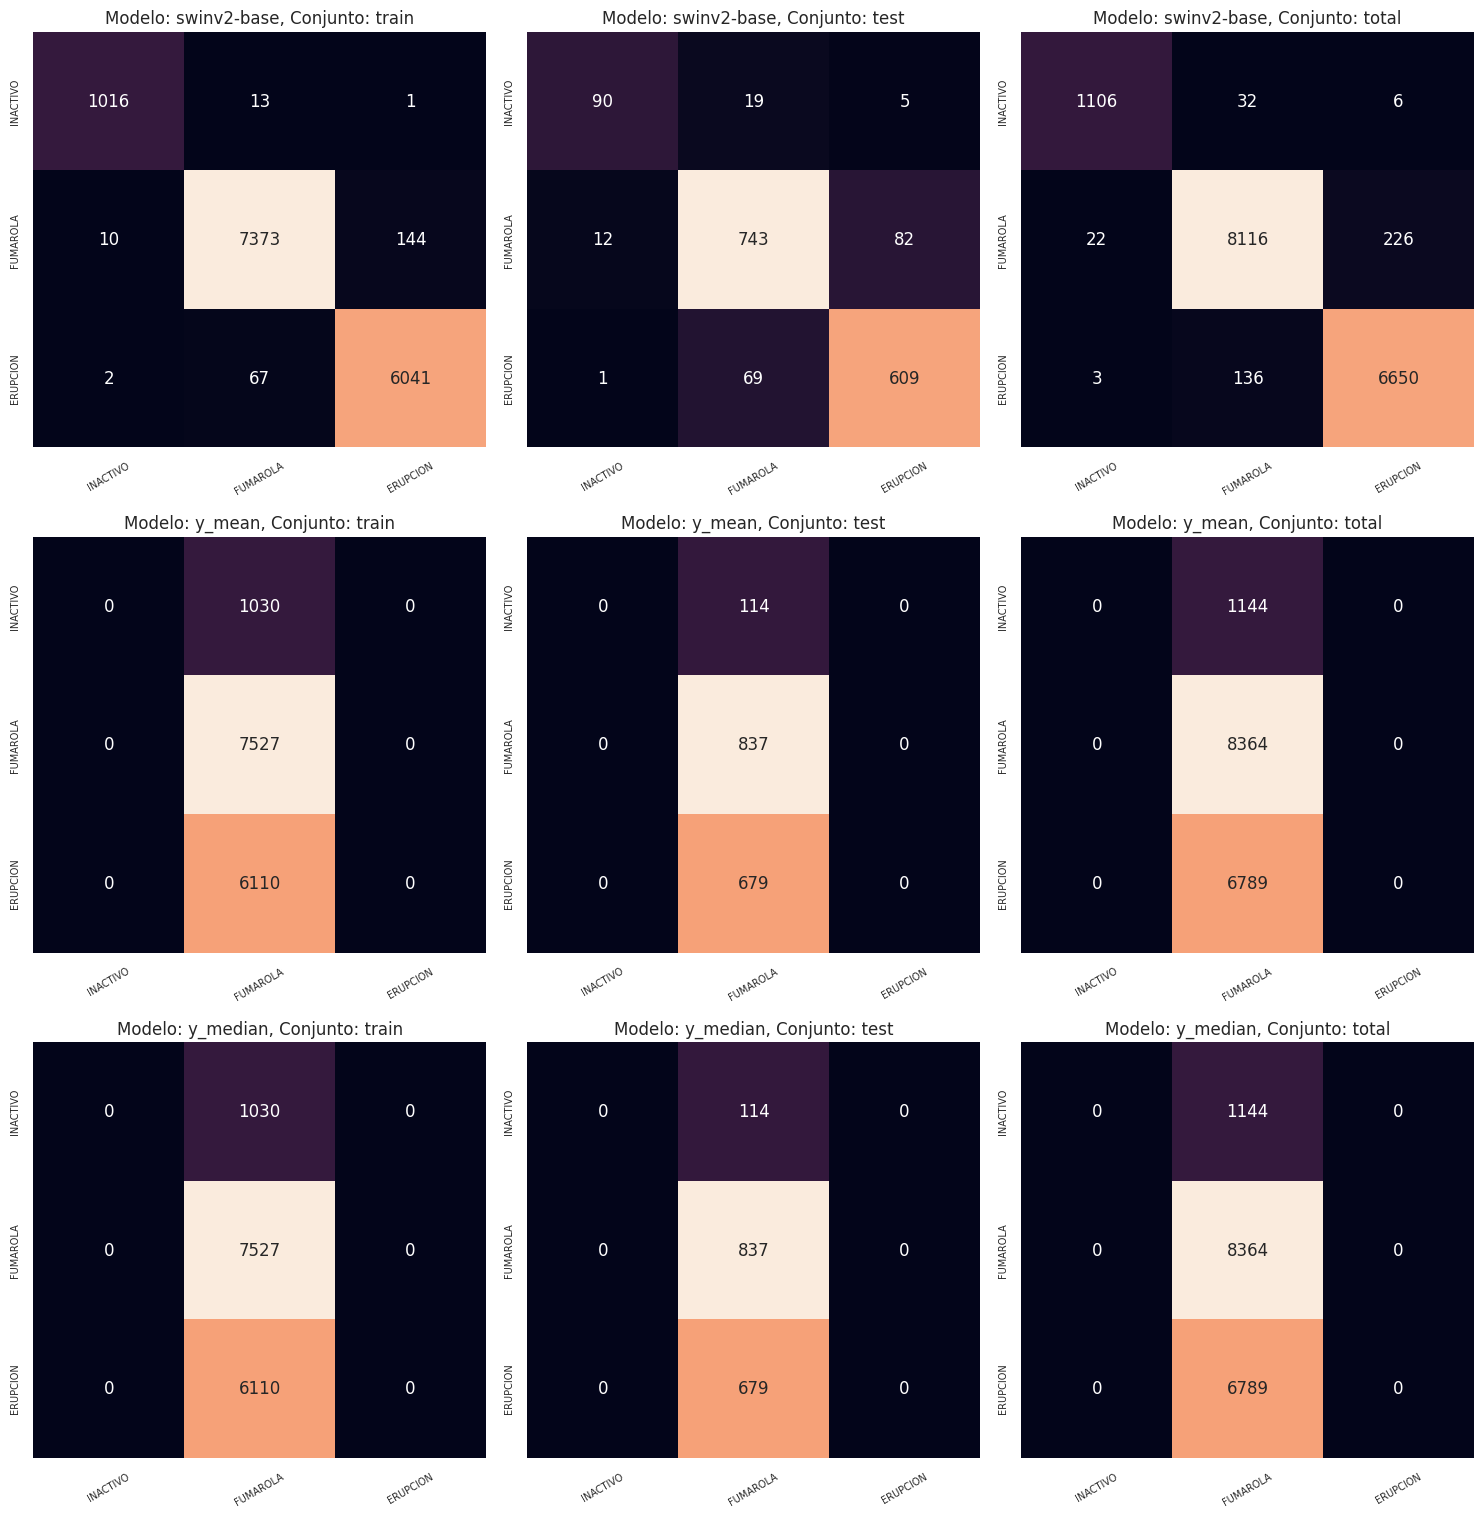

In [22]:

labels = ["INACTIVO", "FUMAROLA", "ERUPCION"]

fig, axes = plt.subplots(6, 3, figsize=(15, 30))
sns.set_theme(style="darkgrid", palette=sns.color_palette("inferno", 7))

for idx, ax in enumerate(axes.flat):
    if idx < len(cmx):
        matrix_data = np.array(cmx.iloc[idx]['MATRIX']).reshape(3,3)
        df_matrix = pd.DataFrame(matrix_data, index=labels, columns=labels)
        sns.heatmap(df_matrix, ax=ax, cbar=False, annot=True, fmt="g")
        ax.set_title(f"Modelo: {cmx.iloc[idx]['MODEL']}, Conjunto: {cmx.iloc[idx]['SLICE']}")
        ax.tick_params(axis='x', rotation=30, labelsize=7)
        ax.tick_params(axis='y', labelsize=7)
        ax.set_xlabel('')
        ax.set_ylabel('')
    else:
        fig.delaxes(ax)  # Remove extra subplots

plt.tight_layout()
